In [31]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [32]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [33]:
df_soja_paranagua = pd.read_csv("../data/raw/soja/INDICADOR DA SOJA CEPEA-ESALQ - PARANAGUÁ.csv")
df_soja_parana = pd.read_csv("../data/raw/soja/INDICADOR DA SOJA CEPEA-ESALQ - PARANÁ.csv")

In [34]:
df_soja_paranagua.head()

,Data,À vista R$,À vista US$
0,13/03/2006,"27,66","12,96"
1,14/03/2006,"27,45","12,91"
2,15/03/2006,"27,58",13
3,16/03/2006,"26,97","12,78"
4,17/03/2006,"26,96","12,68"


In [35]:
df_soja_parana.head()

,Data,À vista R$,À vista US$
0,29/07/1997,"18,04","16,66"
1,30/07/1997,"17,97","16,59"
2,31/07/1997,"18,17","16,78"
3,01/08/1997,"18,1","16,71"
4,04/08/1997,"18,23","16,83"


## INDICADOR DA SOJA CEPEA-ESALQ - PARANAGUÁ

In [36]:
df_soja_paranagua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         4773 non-null   object
 1   À vista R$   4773 non-null   object
 2   À vista US$  4773 non-null   object
dtypes: object(3)
memory usage: 112.0+ KB


In [37]:
df_soja_paranagua_br = extract_currency_series(df_soja_paranagua)
df_soja_paranagua_br.head()

,Data,À vista R$
0,13/03/2006,"27,66"
1,14/03/2006,"27,45"
2,15/03/2006,"27,58"
3,16/03/2006,"26,97"
4,17/03/2006,"26,96"


In [38]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_soja_paranagua_br = rename_columns_and_set_id(df_soja_paranagua_br, cols_dict_brl, "SOJA_PARANAGUA")
df_soja_paranagua_br = convert_column_to_datetime(df_soja_paranagua_br, "ds")
df_soja_paranagua_br = convert_column_to_float(df_soja_paranagua_br, "y")

df_soja_paranagua_br.head()

,ds,y,unique_id
0,2006-03-13,27.66,SOJA_PARANAGUA
1,2006-03-14,27.45,SOJA_PARANAGUA
2,2006-03-15,27.58,SOJA_PARANAGUA
3,2006-03-16,26.97,SOJA_PARANAGUA
4,2006-03-17,26.96,SOJA_PARANAGUA


In [39]:
df_soja_paranagua_br.tail()

,ds,y,unique_id
4768,2025-04-30,132.14,SOJA_PARANAGUA
4769,2025-05-02,133.16,SOJA_PARANAGUA
4770,2025-05-05,132.13,SOJA_PARANAGUA
4771,2025-05-06,133.30,SOJA_PARANAGUA
4772,2025-05-07,132.60,SOJA_PARANAGUA


In [40]:
df_soja_paranagua_br = drop_over_limit_date(df_soja_paranagua_br, '01/05/2025', "ds")
df_soja_paranagua_br.tail()

,ds,y,unique_id
4764,2025-04-24,135.13,SOJA_PARANAGUA
4765,2025-04-25,135.04,SOJA_PARANAGUA
4766,2025-04-28,134.42,SOJA_PARANAGUA
4767,2025-04-29,132.59,SOJA_PARANAGUA
4768,2025-04-30,132.14,SOJA_PARANAGUA


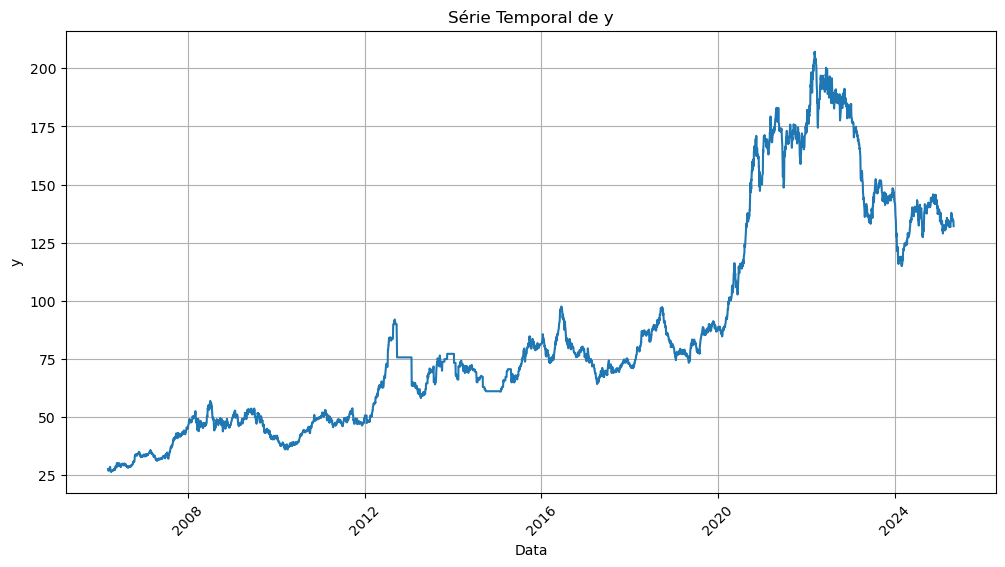

In [41]:
plot_raw_series(df_soja_paranagua_br, "y")

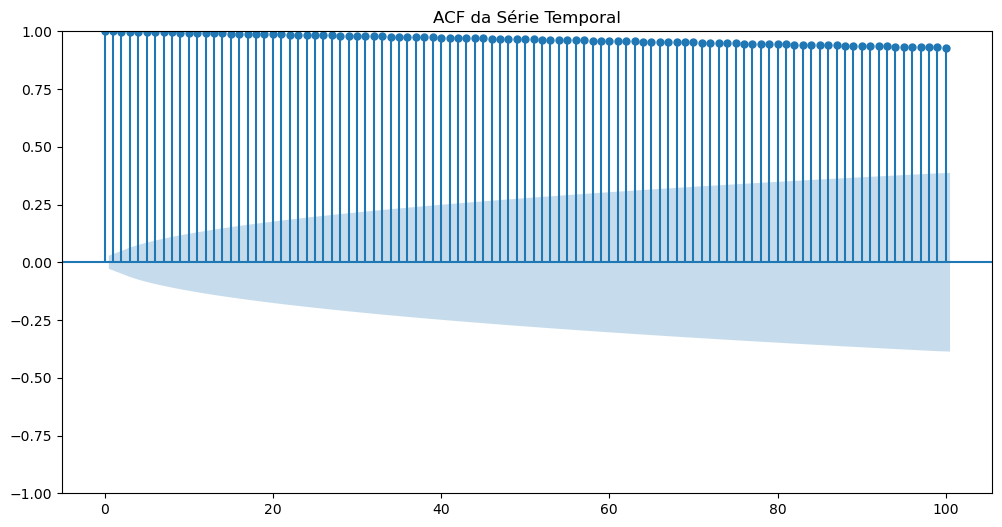

In [42]:
plot_series_acf(df_soja_paranagua_br['y'])

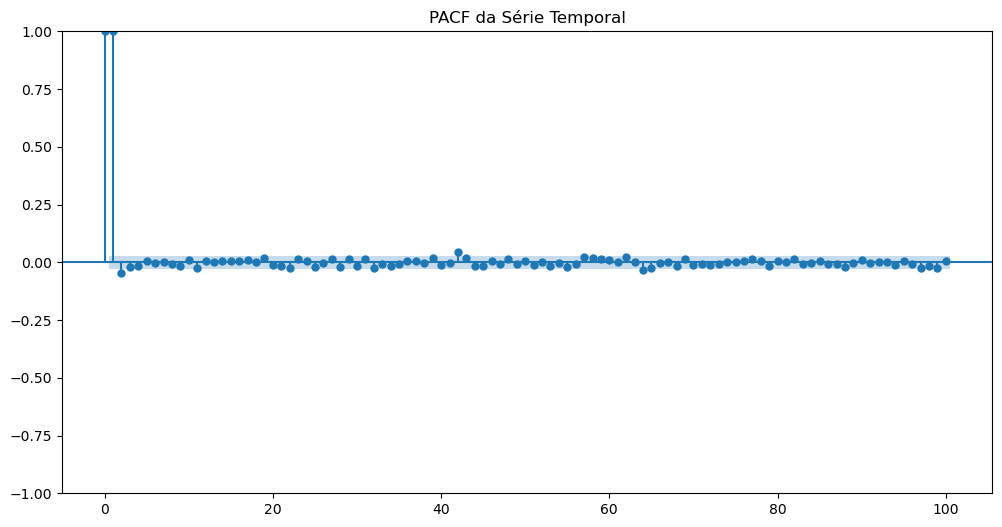

In [43]:
plot_series_pacf(df_soja_paranagua_br['y'])

In [44]:
checks_stationarity(df_soja_paranagua_br['y'])

ADF Statistic: -1.2062139586827345
p-value: 0.6709169276858048
Críticos: {'1%': np.float64(-3.431731221687337), '5%': np.float64(-2.862150343170579), '10%': np.float64(-2.5670948876908053)}
❌ Série não é estacionária.


In [45]:
export_to_parquet(df_soja_paranagua_br, "../data/soja/soja_paranagua_brl.parquet")

Arquivo salvo em: ../data/soja/soja_paranagua_brl.parquet


## INDICADOR DA SOJA CEPEA-ESALQ - PARANÁ

In [46]:
df_soja_parana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6916 entries, 0 to 6915
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         6916 non-null   object
 1   À vista R$   6916 non-null   object
 2   À vista US$  6916 non-null   object
dtypes: object(3)
memory usage: 162.2+ KB


In [47]:
df_soja_parana_br = extract_currency_series(df_soja_parana)
df_soja_parana_br.head()

,Data,À vista R$
0,29/07/1997,"18,04"
1,30/07/1997,"17,97"
2,31/07/1997,"18,17"
3,01/08/1997,"18,1"
4,04/08/1997,"18,23"


In [48]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_soja_parana_br = rename_columns_and_set_id(df_soja_parana_br, cols_dict_brl, "SOJA_PARANA")
df_soja_parana_br = convert_column_to_datetime(df_soja_parana_br, "ds")
df_soja_parana_br = convert_column_to_float(df_soja_parana_br, "y")

df_soja_parana_br.head()

,ds,y,unique_id
0,1997-07-29,18.04,SOJA_PARANA
1,1997-07-30,17.97,SOJA_PARANA
2,1997-07-31,18.17,SOJA_PARANA
3,1997-08-01,18.10,SOJA_PARANA
4,1997-08-04,18.23,SOJA_PARANA


In [49]:
df_soja_parana_br.tail()

,ds,y,unique_id
6911,2025-04-30,127.79,SOJA_PARANA
6912,2025-05-02,128.37,SOJA_PARANA
6913,2025-05-05,128.02,SOJA_PARANA
6914,2025-05-06,127.92,SOJA_PARANA
6915,2025-05-07,127.77,SOJA_PARANA


In [50]:
df_soja_parana_br = drop_over_limit_date(df_soja_parana_br, '01/05/2025', "ds")
df_soja_parana_br.tail()

,ds,y,unique_id
6907,2025-04-24,129.06,SOJA_PARANA
6908,2025-04-25,130.14,SOJA_PARANA
6909,2025-04-28,129.87,SOJA_PARANA
6910,2025-04-29,129.22,SOJA_PARANA
6911,2025-04-30,127.79,SOJA_PARANA


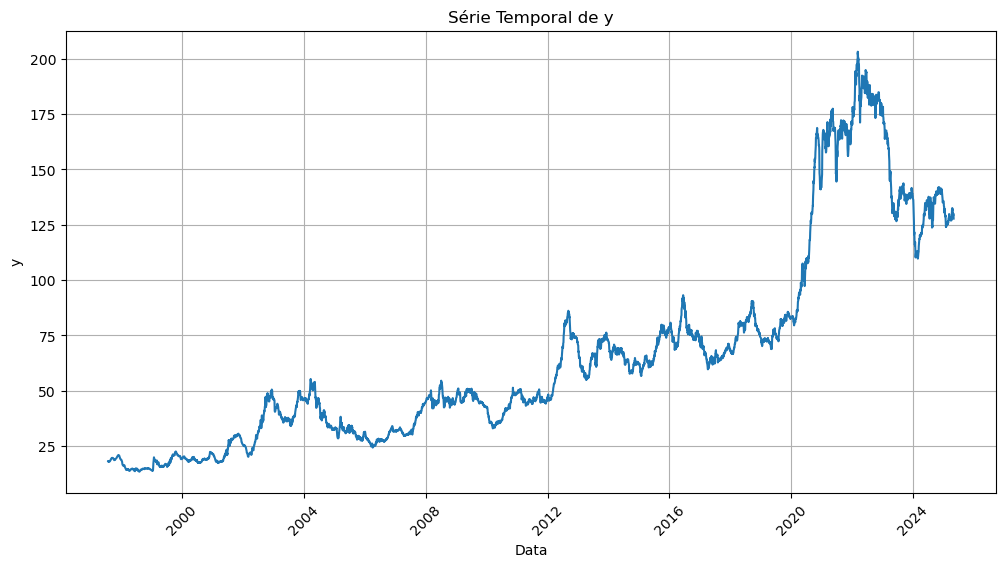

In [51]:
plot_raw_series(df_soja_parana_br, "y")

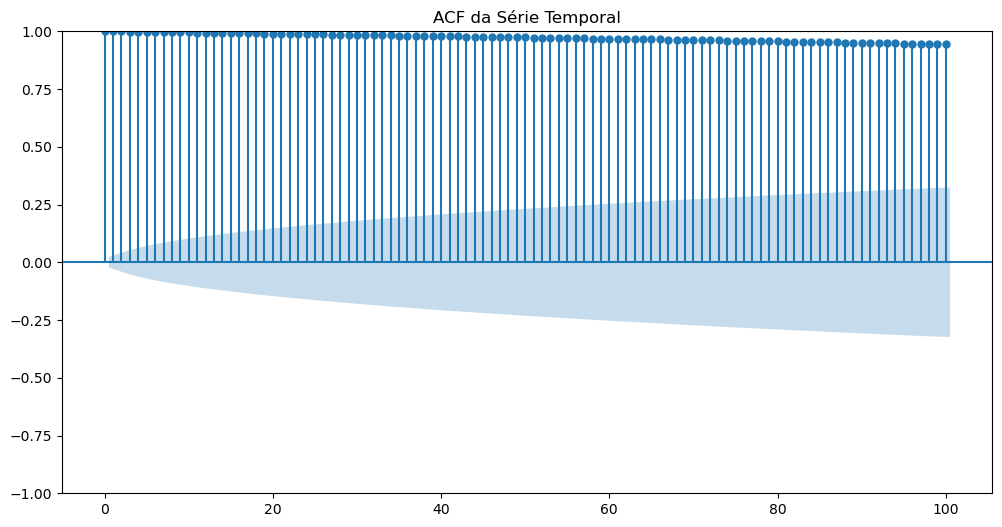

In [52]:
plot_series_acf(df_soja_parana_br['y'])

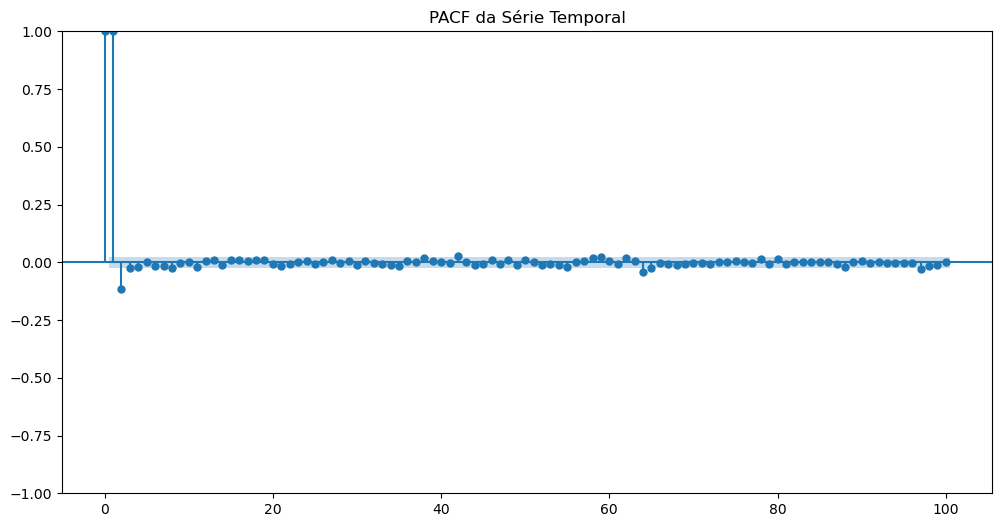

In [53]:
plot_series_pacf(df_soja_parana_br['y'])

In [54]:
checks_stationarity(df_soja_parana_br['y'])

ADF Statistic: -0.8988744896373254
p-value: 0.7883428384146383
Críticos: {'1%': np.float64(-3.4313000057181062), '5%': np.float64(-2.8619598251111205), '10%': np.float64(-2.566993469057382)}
❌ Série não é estacionária.


In [56]:
export_to_parquet(df_soja_parana_br, "../data/soja/soja_parana_brl.parquet")

Arquivo salvo em: ../data/soja/soja_parana_brl.parquet
